# Preliminaries
To use the MIT-BIH database we need the external python library wfdb.

To install wfdb simply run "pip install wfdb". More info about wfdb can be found here https://wfdb.readthedocs.io/en/latest/

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [3]:
record = wfdb.rdrecord('mitdb/100')
annotation = wfdb.rdann('mitdb/100', 'atr')
display(record.__dict__)
display(annotation.__dict__)

{'record_name': '100',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal'],
 'sig_name': ['MLII', 'V5'],
 'p_signal': array([[-0.145, -0.065],
        [-0.145, -0.065],
        [-0.145, -0.065],
        ...,
        [-0.675, -0.365],
        [-0.765, -0.335],
        [-1.28 ,  0.   ]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['100.dat', '100.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [1024, 1024],
 'init_value': [995, 1011],
 'checksum': [-22131, 20052],
 'block_size': [0, 0]}

{'record_name': '100',
 'extension': 'atr',
 'sample': array([    18,     77,    370, ..., 649484, 649734, 649991]),
 'symbol': ['+',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'A',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N',
  'N'

In [4]:
def to_aami(ann):
    if ann in {"N","L","R","e","j"}:
        return "Normal"
    if ann in {"V","!","E"}:
        return "Ventricular"
    if ann in {"A","a","S","J"}:
        return "Supraventricular"
    if ann == "F":
        return "Fusion beat"
    else: 
        return "Unknown beats"

data = {}
for file in os.listdir("mitdb"):
    if file.endswith(".atr"):
        annotation = wfdb.rdann("mitdb/"+file.split(".")[0], 'atr')
        count = {}
        for a in annotation.symbol:
            if a in count:
                count[a] += 1
            else:
                count[a] = 1
        data[annotation.record_name] = count

In [5]:
# Print count of all BA beats per patient
for patient in data:
    print("--- Patient no. {} ---".format(patient))
    s = sum(data[patient].values())
    for (k, v) in data[patient].items():
        print("{}: {:.2%}\t{}".format(k, v/s, v))
    print("-----------------------")
        
    

--- Patient no. 100 ---
+: 0.04%	1
N: 98.46%	2239
A: 1.45%	33
V: 0.04%	1
-----------------------
--- Patient no. 101 ---
+: 0.05%	1
N: 99.25%	1860
~: 0.21%	4
|: 0.21%	4
Q: 0.11%	2
A: 0.16%	3
-----------------------
--- Patient no. 102 ---
+: 0.23%	5
/: 92.52%	2028
f: 2.55%	56
N: 4.52%	99
V: 0.18%	4
-----------------------
--- Patient no. 103 ---
+: 0.05%	1
N: 99.57%	2082
~: 0.29%	6
A: 0.10%	2
-----------------------
--- Patient no. 104 ---
+: 1.95%	45
/: 59.71%	1380
f: 28.82%	666
~: 1.60%	37
Q: 0.78%	18
N: 7.05%	163
V: 0.09%	2
-----------------------
--- Patient no. 105 ---
+: 0.04%	1
N: 93.87%	2526
V: 1.52%	41
~: 3.27%	88
|: 1.11%	30
Q: 0.19%	5
-----------------------
--- Patient no. 106 ---
~: 1.43%	30
+: 1.95%	41
N: 71.83%	1507
V: 24.79%	520
-----------------------
--- Patient no. 107 ---
+: 0.05%	1
/: 97.10%	2078
V: 2.76%	59
~: 0.09%	2
-----------------------
--- Patient no. 108 ---
+: 0.05%	1
N: 95.34%	1739
V: 0.93%	17
x: 0.60%	11
~: 2.25%	41
|: 0.44%	8
F: 0.11%	2
A: 0.22%	4
j: 0.

+: 1291		1.15%
N: 75052		66.63%
A: 2546		2.26%
V: 7130		6.33%
~: 616		0.55%
|: 132		0.12%
Q: 33		0.03%
/: 7028		6.24%
f: 982		0.87%
x: 193		0.17%
F: 803		0.71%
j: 229		0.20%
L: 8075		7.17%
a: 150		0.13%
J: 83		0.07%
R: 7259		6.44%
[: 6		0.01%
!: 472		0.42%
]: 6		0.01%
E: 106		0.09%
S: 2		0.00%
": 437		0.39%
e: 16		0.01%


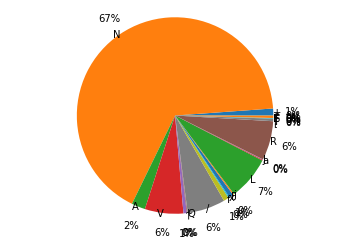

In [6]:
labels, values, percentage = [], [], []
for patient in data:
    for (k, v) in data[patient].items():
        if k in labels:
            values[labels.index(k)] += v
        else:
            labels.append(k)
            values.append(v)

s = sum(values)
for v in values:
    percentage.append("{:.2%}".format(v/s))

for i in range(len(labels)):
    print("{}: {}\t\t{}".format(labels[i],values[i],percentage[i]))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = [0,0,0,0.2,0]
plt.pie(values, labels=labels, autopct='%1.0f%%', pctdistance=1.2, labeldistance=1)
plt.axis('equal')
plt.show()
    

--- Patient 100 ---
  - MLII
  - V5
--- Patient 101 ---
  - MLII
  - V1
--- Patient 102 ---
  - V5
  - V2
--- Patient 103 ---
  - MLII
  - V2
--- Patient 104 ---
  - V5
  - V2
--- Patient 105 ---
  - MLII
  - V1
--- Patient 106 ---
  - MLII
  - V1
--- Patient 107 ---
  - MLII
  - V1
--- Patient 108 ---
  - MLII
  - V1
--- Patient 109 ---
  - MLII
  - V1
--- Patient 111 ---
  - MLII
  - V1
--- Patient 112 ---
  - MLII
  - V1
--- Patient 113 ---
  - MLII
  - V1
--- Patient 114 ---
  - V5
  - MLII
--- Patient 115 ---
  - MLII
  - V1
--- Patient 116 ---
  - MLII
  - V1
--- Patient 117 ---
  - MLII
  - V2
--- Patient 118 ---
  - MLII
  - V1
--- Patient 119 ---
  - MLII
  - V1
--- Patient 121 ---
  - MLII
  - V1
--- Patient 122 ---
  - MLII
  - V1
--- Patient 123 ---
  - MLII
  - V5
--- Patient 124 ---
  - MLII
  - V4
--- Patient 200 ---
  - MLII
  - V1
--- Patient 201 ---
  - MLII
  - V1
--- Patient 202 ---
  - MLII
  - V1
--- Patient 203 ---
  - MLII
  - V1
--- Patient 205 ---
  - MLII
  -

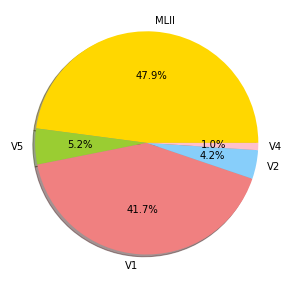

In [11]:
# prints signals used for all patients
labels, values = [], []
for file in os.listdir("mitdb"):
    if file.endswith(".atr"):
        record = wfdb.rdrecord("mitdb/"+file.split(".")[0])
        print("--- Patient {} ---".format(record.record_name))
        for s in record.sig_name:
            print("  - {}".format(s))
            if s in labels:
                values[labels.index(s)] += 1
            else:
                labels.append(s)
                values.append(1)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']

plt.axis('equal')
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Unknown beats: 10724		9.52%
Normal: 90631		80.46%
Supraventricular: 2781		2.47%
Ventricular: 7708		6.84%
Fusion beat: 803		0.71%


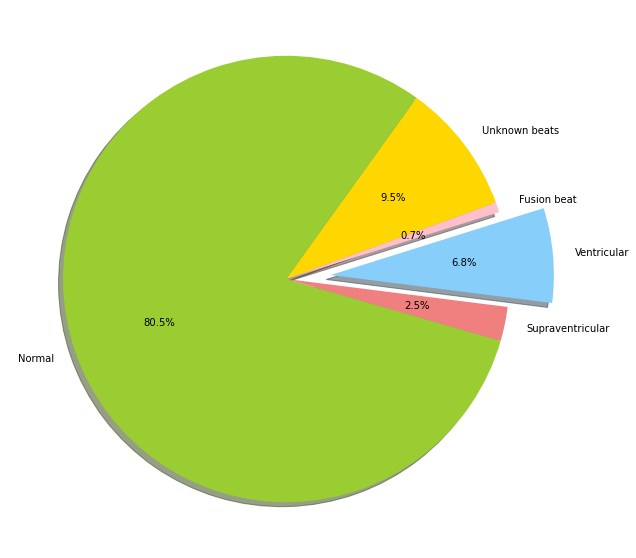

In [67]:
labels, values, percentage = [], [], []
for patient in data:
    for (k, v) in data[patient].items():
        k = to_aami(k)
        if k in labels:
            values[labels.index(k)] += v
        else:
            labels.append(k)
            values.append(v)

s = sum(values)
for v in values:
    percentage.append("{:.2%}".format(v/s))

for i in range(len(labels)):
    print("{}: {}\t\t{}".format(labels[i],values[i],percentage[i]))

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = [0,0,0,0.2,0]

# Plot
plt.axis('equal')
plt.pie(values, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()